<a href="https://colab.research.google.com/github/Alijgh003/StyleMind-GNN/blob/main/StyleMind_GCN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

In [2]:
torch_version = str(torch.__version__)
# scatter_src = f"https://pytorch-geometric.com/whl/torch-{torch_version}.html"
# sparse_src = f"https://pytorch-geometric.com/whl/torch-{torch_version}.html"
# !pip install torch-scatter -f $scatter_src
# !pip install torch-sparse -f $sparse_src
!pip install torch-geometric
!pip install -q git+https://github.com/snap-stanford/deepsnap.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.1 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
datasets_path = "/content/drive/MyDrive/StyleMind-GNN"

In [4]:
from os import path

In [5]:
import pandas as pd
items = pd.read_csv(path.join(datasets_path, "new_items.csv"))
items.set_index("ID")

,Unnamed: 0,index,url_name,description,catgeories,title,related,category_id,semantic_category,name_len
ID,,,,,,,,,,
211990161,0,0,neck print chiffon plus size,NaN,NaN,NaN,NaN,3,tops,28
183179503,1,1,christian pellizzari floral jacquard trousers,Gold and black silk blend floral jacquard trou...,"[""Women's Fashion"", 'Clothing', 'Pants', 'Chri...",Christian Pellizzari floral jacquard trousers,"['Floral pants', 'Grey pants', 'Print pants', ...",2,bottoms,45
152771755,2,2,natures jewelry stainless steel not,NaN,NaN,NaN,NaN,11,jewellery,35
190445143,3,3,balmain women high waist flared,Decorative gold colored buttons with lion deta...,"[""Women's Fashion"", 'Clothing', 'Pants', 'Balm...",Balmain Women High Waist Flared Knit Pants,"['Balmain', 'Flared pants', 'High-waisted pant...",2,bottoms,31
211444470,4,4,acler orson high waist belted,This Acler Orson High Waist Belted Short featu...,"[""Women's Fashion"", 'Clothing', 'Shorts', 'Mar...",Acler Orson High Waist Belted Short,"['Short shorts', 'High-waisted shorts', 'High ...",2,bottoms,29
...,...,...,...,...,...,...,...,...,...,...
108411005,251003,251003,arnica embellished hand painted skirt,Shop Stella Jean in our expertly curated in-se...,"[""Women's Fashion"", 'Clothing', 'Skirts', 'Kne...",Arnica Embellished Hand Painted Skirt,"['Red skirt', 'Embellished skirt']",2,bottoms,37
212452593,251004,251004,thom browne little boy knitted,NaN,NaN,NaN,NaN,4,outerwear,30
208651882,251005,251005,colorful vortex print shawl scarf,NaN,NaN,NaN,NaN,8,scarves,33


In [6]:
x = torch.load(path.join(datasets_path, "items_img2vec.pth"))
x, x.shape

(tensor([[0.2134, 0.4643, 0.3334,  ..., 0.3668, 0.0379, 0.0898],
         [0.5982, 0.7184, 0.2694,  ..., 0.2122, 0.6592, 0.0720],
         [0.3819, 4.5064, 0.2355,  ..., 0.2252, 0.7095, 0.4182],
         ...,
         [0.0192, 0.2306, 0.6947,  ..., 0.2099, 0.2533, 0.1645],
         [0.4130, 0.2520, 0.2924,  ..., 0.5590, 0.3986, 0.0838],
         [0.0576, 1.2712, 1.8085,  ..., 0.6934, 0.9322, 0.0889]]),
 torch.Size([251008, 2048]))

In [7]:
x.dtype ,x.shape

(torch.float32, torch.Size([251008, 2048]))

In [8]:
edge_indices_path = path.join(datasets_path, "dataset", "polyvore_outfits", "nondisjoint")

In [9]:
train_edge_index = torch.load(path.join(edge_indices_path, "train_edge_index.pth"))
test_edge_index = torch.load(path.join(edge_indices_path, "test_edge_index.pth"))
valid_edge_index = torch.load(path.join(edge_indices_path, "valid_edge_index.pth"))

In [10]:
train_edge_index.shape, valid_edge_index.shape, test_edge_index.shape

(torch.Size([53306, 2, 171]),
 torch.Size([5000, 2, 91]),
 torch.Size([10000, 2, 136]))

In [11]:
negative_train_edge_index = torch.load(path.join(edge_indices_path,"negative_train_edge_index.pth"))

negative_train_edge_index.shape

torch.Size([53306, 2, 171])

In [12]:
def get_node_embedding_with_mask_meaningless_edge_index_elements(x, edge_index):
  mask = torch.where(edge_index==-1, torch.tensor(0), torch.tensor(1)).unsqueeze(-1)
  r = x[edge_index] * mask
  return r

In [13]:
def concat_edge_indices(edge_index_tensor_by_groups):
  result = torch.cat([edge_index_tensor_by_groups[i] for i in range(edge_index_tensor_by_groups.shape[0])],dim=-1)
  result = result[:,torch.where(result[0]>-1)[0]]
  return result

In [14]:
concat_edge_indices(train_edge_index[:1])

tensor([[204439, 154376, 154376, 154376, 154376, 154376, 154376, 154376, 191980,
         191980, 191980, 192270, 192270, 192270, 192270,   6713,   6713,  78057,
          78057,  78057,  78057,  78057, 100757, 100757, 100757, 100757, 100757,
         100757],
        [249298, 249298, 204439, 191980, 192270,   6713,  78057, 100757, 249298,
         204439,   6713, 249298, 204439, 191980,   6713, 249298, 204439, 249298,
         204439, 191980, 192270,   6713, 249298, 204439, 191980, 192270,   6713,
          78057]])

In [15]:
x.shape

torch.Size([251008, 2048])

In [60]:
from torch import nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, GATConv,MessagePassing
from torch_geometric.utils import to_undirected

import torch.optim as optim

In [61]:
class MyGCNMLP(MessagePassing):
  def __init__(self,in_channels, out_channels):
    super(MyGCNMLP, self).__init__()

    self.lin = torch.nn.Linear(in_channels, out_channels)


  def forward(self, x, edge_index):
    return self.lin(x)

In [23]:
class StyleMindGCN(nn.Module):
  def __init__(self, in_channels, hidden_channels, out_channels ,number_of_layers, model_type="GCN", dropout=0.5):
    super(StyleMindGCN,self).__init__()

    self.convs = torch.nn.ModuleList([self.get_model(model_type)(in_channels if i==0 else hidden_channels,hidden_channels if i<number_of_layers-1 else out_channels) for i in range(number_of_layers)])
    self.bns = torch.nn.ModuleList([torch.nn.BatchNorm1d(hidden_channels) for i in range(number_of_layers-1)])

    self.dropout = dropout


  def reset_parameters(self):
    for conv in self.convs:
        conv.reset_parameters()
    for bn in self.bns:
        bn.reset_parameters()


  def get_model(self, model_type):
    if(model_type=="GAT"):
      return GATConv
    elif(model_type=="MLP"):
      return MyGCNMLP

    else:
      return GCNConv

  def forward(self, x, edge_index, outfits):
    # x is the tensor of node_features (i.e. ResNet representation of each image of each garment)
    # edge_index is the (2, |E|) to represent edges between garments
    # outfits are 3 dim tensors with shape of (|O|, 2 , |Maximum combination of garments in the outfits in dataset|)
    edge_index = to_undirected(edge_index)

    for conv, bn in zip(self.convs[:-1], self.bns):
      x = conv(x, edge_index)
      x = bn(x)
      x = F.relu(x)
      x = F.dropout(x, self.dropout)

    x = self.convs[-1](x,edge_index)

    o = get_node_embedding_with_mask_meaningless_edge_index_elements(x,outfits)
    # the output will be in the shape of (|O|, 2, |Maximum combination of garments in the outfits in dataset|)
    o = (o[:,0,:] * o[:,1,:]).sum(dim=(-1,-2)) / (outfits[:,:1,:]>=0).float().sum(dim=(-1,-2))
    # the output will be in the shape of |O|
    o = F.sigmoid(o)
    return x, o



In [18]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [19]:
def train(model, x, edge_index, outfits, labels, optimizer, loss_fn):
  model.train()
  optimizer.zero_grad()
  embds,o = model(x, edge_index, outfits)

  loss = loss_fn(o, labels)
  loss.backward()

  optimizer.step()

  return loss.item()

In [20]:
@torch.no_grad()
def test(model, x, edge_index, outfits, labels):
  model.eval()

  embds,o = model(x, edge_index, outfits)
  o_pred = torch.where(o>=0.5, torch.tensor(1), torch.tensor(0))

  acc = (o_pred==labels).float().sum() / o_pred.shape[0]

  return  acc

In [21]:
in_channels = x.shape[-1]
hidden_channels = 128
out_channels = 128
lr = 0.01
number_of_layers = 3
dropout = 0.5

In [24]:
model = StyleMindGCN(in_channels, hidden_channels
                     ,out_channels, number_of_layers,"GCN", dropout).to(device)

In [24]:
import gc

gc.collect()

158

In [45]:
torch.cuda.empty_cache()

In [46]:
print(f"Memory allocated: {torch.cuda.memory_allocated() / (1024 ** 2):.2f} MB")
print(f"Memory reserved: {torch.cuda.memory_reserved() / (1024 ** 2):.2f} MB")

Memory allocated: 3474.02 MB
Memory reserved: 7214.00 MB


In [26]:
train_edge_index.shape

torch.Size([53306, 2, 171])

In [25]:
NUM_EPOCHS = 300

# TODO:
- [x] splitting train dataset to two part
      - message_passing
      - labels
- [x] negative sampling  
  naive negative sampling: We just have randomly selected
    8 nodes to combine(2,nodes) to create some negative samples

In [26]:
%%time
def split_train_data(train_edge_index, diameter=8):
  edge_nums =  train_edge_index.shape[0]
  random_permutation = torch.randperm(edge_nums)
  eval_outfits = train_edge_index[random_permutation[:edge_nums//diameter]]
  message_passing_edges = concat_edge_indices(train_edge_index[random_permutation[edge_nums//diameter:]])
  return eval_outfits, message_passing_edges

a = split_train_data(train_edge_index)
[value.shape for  value in a]

CPU times: user 264 ms, sys: 204 ms, total: 468 ms
Wall time: 472 ms


[torch.Size([6663, 2, 171]), torch.Size([2, 601718])]

# Naive negative sampling

In [27]:
%%time
import torch
import itertools

def create_random_negative_samples(num_set, num_samples, num_garment, padding_size):
  combinations = [[list(itertools.combinations(torch.randperm(x.shape[0])[:num_garment].tolist(), 2)) for i in range(num_samples)] for j in range(num_set)]

  tensor = torch.tensor(combinations).transpose(-1,-2)
  tensor = torch.cat((tensor.flip(-2), tensor), dim=-1)
  result = torch.full((num_set, num_samples, 2, padding_size), -1)
  result[:,:,:,:tensor.shape[-1]] = tensor
  return result

# negative_samples = create_random_negative_samples(10, 5000, 8, train_edge_index.shape[-1])
# negative_samples.shape

CPU times: user 11 µs, sys: 0 ns, total: 11 µs
Wall time: 15 µs


In [28]:
valid_negative_samples = create_random_negative_samples(1, valid_edge_index.shape[0],8, valid_edge_index.shape[-1])[0]
test_negative_samples = create_random_negative_samples(1, test_edge_index.shape[0],8, test_edge_index.shape[-1])[0]
valid_negative_samples.shape, test_negative_samples.shape

(torch.Size([5000, 2, 91]), torch.Size([10000, 2, 136]))

In [ ]:
model.reset_parameters()

optimizer = optim.Adam(model.parameters(), lr)
loss_fn = nn.BCELoss()

x = x.to(device)
for epoch in range(NUM_EPOCHS):

    train_positives_eval_outfits, message_passing_edges = split_train_data(train_edge_index, 8)
    train_negatives_eval_outfits = negative_samples[epoch % negative_samples.shape[0]]
    train_labels = torch.cat((torch.ones(train_positives_eval_outfits.shape[0]),
                              torch.zeros(train_negatives_eval_outfits.shape[0])))
    train_eval_outfits = torch.cat((train_positives_eval_outfits, train_negatives_eval_outfits), dim=0)
    train_loss = train(model, x, message_passing_edges.to(device)
    , train_eval_outfits.to(device), train_labels.to(device),
                       loss_fn=loss_fn, optimizer=optimizer)
    train_acc = test(model, x, message_passing_edges.to(device)
    , train_eval_outfits.to(device), train_labels.to(device))


    valid_message_passing_edges = torch.cat((concat_edge_indices(train_positives_eval_outfits)
    , message_passing_edges), dim=-1)
    valid_labels = torch.cat((torch.ones(valid_edge_index.shape[0]),
                              torch.zeros(valid_negative_samples.shape[0])))
    valid_eval_outfits = torch.cat((valid_edge_index, valid_negative_samples), dim=0)
    valid_acc = test(model, x, valid_message_passing_edges.to(device)
    , valid_eval_outfits.to(device), valid_labels.to(device))



    test_message_passing_edges = torch.cat((concat_edge_indices(valid_edge_index)
    , valid_message_passing_edges), dim=-1)
    test_labels = torch.cat((torch.ones(test_edge_index.shape[0]),
                              torch.zeros(test_negative_samples.shape[0])))
    test_eval_outfits = torch.cat((test_edge_index, test_negative_samples), dim=0)
    test_acc = test(model, x, test_message_passing_edges.to(device)
    , test_eval_outfits.to(device), test_labels.to(device))

    print(f'Epoch: {epoch:02d}, '
          f'Loss: {train_loss:.4f}, '
          f'Train: {100 * train_acc:.2f}%, '
          f'Valid: {100 * valid_acc:.2f}% '
          f'Test: {100 * test_acc:.2f}%')



Epoch: 00, Loss: 15.5558, Train: 57.13%, Valid: 50.00% Test: 49.99%
Epoch: 01, Loss: 6.2417, Train: 57.02%, Valid: 49.93% Test: 49.92%
Epoch: 02, Loss: 2.2776, Train: 57.07%, Valid: 49.98% Test: 49.95%
Epoch: 03, Loss: 4.9023, Train: 57.10%, Valid: 49.97% Test: 49.97%
Epoch: 04, Loss: 4.2414, Train: 57.06%, Valid: 49.93% Test: 49.95%
Epoch: 05, Loss: 2.1029, Train: 57.04%, Valid: 49.97% Test: 49.94%
Epoch: 06, Loss: 1.7390, Train: 57.10%, Valid: 49.99% Test: 49.98%
Epoch: 07, Loss: 2.0399, Train: 57.10%, Valid: 49.98% Test: 50.00%
Epoch: 08, Loss: 2.0631, Train: 57.12%, Valid: 49.98% Test: 49.99%
Epoch: 09, Loss: 1.8429, Train: 57.04%, Valid: 49.93% Test: 49.92%
Epoch: 10, Loss: 1.3993, Train: 57.04%, Valid: 49.92% Test: 49.88%
Epoch: 11, Loss: 1.2240, Train: 56.98%, Valid: 49.81% Test: 49.76%
Epoch: 12, Loss: 1.0704, Train: 56.88%, Valid: 49.83% Test: 49.83%
Epoch: 13, Loss: 1.0720, Train: 56.97%, Valid: 49.80% Test: 49.79%
Epoch: 14, Loss: 1.0925, Train: 56.81%, Valid: 49.62% Test: 4

KeyboardInterrupt: 

## results:
We achived the best test result of 75.22 in epoch 396. In addition, we think that we will achieve better results, if we use a stronger approach for negative sampling, like using compatiblity dataset that is available.

in the next section, we will train our model on a dataset with better negative samples, but also the same positive ones.

# Better negative samples

In [29]:
import matplotlib.pyplot as plt

In [31]:
import copy

In [32]:
model.reset_parameters()

losses = []
test_accs = []

best_test_acc = 0
best_model = None

optimizer = optim.Adam(model.parameters(), lr)
loss_fn = nn.BCELoss()

x = x.to(device)
for epoch in range(NUM_EPOCHS):

    train_positives_eval_outfits, message_passing_edges = split_train_data(train_edge_index, 5)
    train_negatives_eval_outfits = negative_train_edge_index[torch.randperm(negative_train_edge_index.shape[0])[:train_positives_eval_outfits.shape[0]]]
    train_labels = torch.cat((torch.ones(train_positives_eval_outfits.shape[0]),
                              torch.zeros(train_negatives_eval_outfits.shape[0])))
    train_eval_outfits = torch.cat((train_positives_eval_outfits, train_negatives_eval_outfits), dim=0)
    train_loss = train(model, x, message_passing_edges.to(device)
    , train_eval_outfits.to(device), train_labels.to(device),
                       loss_fn=loss_fn, optimizer=optimizer)
    train_acc = test(model, x, message_passing_edges.to(device)
    , train_eval_outfits.to(device), train_labels.to(device))


    valid_message_passing_edges = torch.cat((concat_edge_indices(train_positives_eval_outfits)
    , message_passing_edges), dim=-1)
    valid_labels = torch.cat((torch.ones(valid_edge_index.shape[0]),
                              torch.zeros(valid_negative_samples.shape[0])))
    valid_eval_outfits = torch.cat((valid_edge_index, valid_negative_samples), dim=0)
    valid_acc = test(model, x, valid_message_passing_edges.to(device)
    , valid_eval_outfits.to(device), valid_labels.to(device))



    test_message_passing_edges = torch.cat((concat_edge_indices(valid_edge_index)
    , valid_message_passing_edges), dim=-1)
    test_labels = torch.cat((torch.ones(test_edge_index.shape[0]),
                              torch.zeros(test_negative_samples.shape[0])))
    test_eval_outfits = torch.cat((test_edge_index, test_negative_samples), dim=0)
    test_acc = test(model, x, test_message_passing_edges.to(device)
    , test_eval_outfits.to(device), test_labels.to(device))

    if(test_acc > best_test_acc):
        best_test_acc = test_acc
        best_model = copy.deepcopy(model)

    losses.append(train_loss)
    test_accs.append(test_acc)
    print(f'Epoch: {epoch:02d}, '
          f'Loss: {train_loss:.4f}, '
          f'Train: {100 * train_acc:.2f}%, '
          f'Valid: {100 * valid_acc:.2f}% '
          f'Test: {100 * test_acc:.2f}%')


Epoch: 00, Loss: 5.8179, Train: 50.00%, Valid: 50.00% Test: 49.99%
Epoch: 01, Loss: 20.0343, Train: 49.94%, Valid: 49.95% Test: 49.93%
Epoch: 02, Loss: 2.9330, Train: 49.93%, Valid: 49.89% Test: 49.92%
Epoch: 03, Loss: 3.4506, Train: 49.92%, Valid: 49.97% Test: 49.98%
Epoch: 04, Loss: 2.5571, Train: 49.95%, Valid: 49.94% Test: 49.95%
Epoch: 05, Loss: 1.8593, Train: 49.94%, Valid: 49.95% Test: 49.95%
Epoch: 06, Loss: 1.5677, Train: 49.95%, Valid: 49.96% Test: 49.96%
Epoch: 07, Loss: 1.5298, Train: 49.94%, Valid: 49.99% Test: 49.97%
Epoch: 08, Loss: 1.4849, Train: 49.95%, Valid: 49.94% Test: 49.94%
Epoch: 09, Loss: 1.3183, Train: 49.93%, Valid: 49.92% Test: 49.94%
Epoch: 10, Loss: 1.2356, Train: 49.93%, Valid: 49.90% Test: 49.93%
Epoch: 11, Loss: 1.0900, Train: 49.90%, Valid: 49.80% Test: 49.91%
Epoch: 12, Loss: 1.0993, Train: 49.85%, Valid: 49.91% Test: 49.90%
Epoch: 13, Loss: 1.0905, Train: 49.88%, Valid: 49.83% Test: 49.88%
Epoch: 14, Loss: 0.9625, Train: 49.85%, Valid: 49.84% Test: 4

In [34]:
best_test_acc

tensor(0.7423, device='cuda:0')

In [56]:
torch.save(best_model.state_dict(), "StyleMind_GCN.pth")

In [55]:
best_model.eval()
test_acc = test(best_model, x, test_message_passing_edges.to(device)
    , test_eval_outfits.to(device), test_labels.to(device))
test_acc

tensor(0.7419, device='cuda:0')

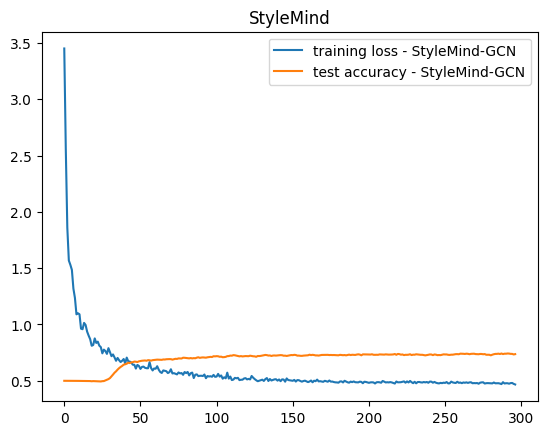

In [51]:

plt.title("StyleMind")
plt.plot(losses[3:], label="training loss" + " - " + "StyleMind-GCN")
plt.plot(test_accs[3:], label="test accuracy" + " - " + "StyleMind-GCN")
plt.legend()
plt.show()


In [57]:
mlp_model = StyleMindGCN(in_channels, hidden_channels
                     ,out_channels, number_of_layers,"MLP", dropout).to(device)

In [58]:
mlp_model.reset_parameters()

losses = []
test_accs = []

best_test_acc = 0
best_mlp_model = None

optimizer = optim.Adam(mlp_model.parameters(), lr)
loss_fn = nn.BCELoss()

x = x.to(device)
for epoch in range(NUM_EPOCHS):

    train_positives_eval_outfits, message_passing_edges = split_train_data(train_edge_index, 5)
    train_negatives_eval_outfits = negative_train_edge_index[torch.randperm(negative_train_edge_index.shape[0])[:train_positives_eval_outfits.shape[0]]]
    train_labels = torch.cat((torch.ones(train_positives_eval_outfits.shape[0]),
                              torch.zeros(train_negatives_eval_outfits.shape[0])))
    train_eval_outfits = torch.cat((train_positives_eval_outfits, train_negatives_eval_outfits), dim=0)
    train_loss = train(mlp_model, x, message_passing_edges.to(device)
    , train_eval_outfits.to(device), train_labels.to(device),
                       loss_fn=loss_fn, optimizer=optimizer)
    train_acc = test(mlp_model, x, message_passing_edges.to(device)
    , train_eval_outfits.to(device), train_labels.to(device))


    valid_message_passing_edges = torch.cat((concat_edge_indices(train_positives_eval_outfits)
    , message_passing_edges), dim=-1)
    valid_labels = torch.cat((torch.ones(valid_edge_index.shape[0]),
                              torch.zeros(valid_negative_samples.shape[0])))
    valid_eval_outfits = torch.cat((valid_edge_index, valid_negative_samples), dim=0)
    valid_acc = test(mlp_model, x, valid_message_passing_edges.to(device)
    , valid_eval_outfits.to(device), valid_labels.to(device))



    test_message_passing_edges = torch.cat((concat_edge_indices(valid_edge_index)
    , valid_message_passing_edges), dim=-1)
    test_labels = torch.cat((torch.ones(test_edge_index.shape[0]),
                              torch.zeros(test_negative_samples.shape[0])))
    test_eval_outfits = torch.cat((test_edge_index, test_negative_samples), dim=0)
    test_acc = test(mlp_model, x, test_message_passing_edges.to(device)
    , test_eval_outfits.to(device), test_labels.to(device))

    if(test_acc > best_test_acc):
        best_test_acc = test_acc
        best_mlp_model = copy.deepcopy(mlp_model)

    losses.append(train_loss)
    test_accs.append(test_acc)
    print(f'Epoch: {epoch:02d}, '
          f'Loss: {train_loss:.4f}, '
          f'Train: {100 * train_acc:.2f}%, '
          f'Valid: {100 * valid_acc:.2f}% '
          f'Test: {100 * test_acc:.2f}%')


TypeError: Linear.forward() takes 2 positional arguments but 3 were given